In [ ]:
import datetime as dt
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
# from scipy.stats import mannwhitneyu, ttest_ind

In [ ]:

# use science style 
plt.style.use(['science', 'no-latex', 'russian-font'])

sns.set_palette('colorblind')
# sns.set_context('talk')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size':16})

In [ ]:
def remove_noize(df:pd.DataFrame):
    df = df.copy()
    elemetns = ['Al', 'Ca', 'Fe', 'K', 'Mg', 'Si']
    mask = df['type']!='background'
    for element in elemetns:
        df.loc[mask, element] = df.loc[mask, element] - df.loc[~mask, element].values[0]
        df.loc[df[element]<0, element]=0
    return df

def ppm_to_mmol(df:pd.DataFrame):
    df=df.copy()
    elemetns = ['Al', 'Ca', 'Fe', 'K', 'Mg', 'Si']
    dict_AEM = {'Al':26.9,
            'Ca':40,
            'Fe':55.845, 
            'K':39,
            'Mg':24.30, 
            'Si':28}

    for element in elemetns:
        df.loc[:, element] = df.loc[:, element] / dict_AEM[element]
    return df

In [ ]:
df = pd.read_excel('../data/Воробьева_25012024.xlsx')

df = df.drop(columns=['code'])

df = ppm_to_mmol(remove_noize(df))

df.head()

,type,days,Al,Ca,Fe,K,Mg,Si,рН,ОВП,ЭП
0,background,0,0.000219,0.09500,0.000090,0.007436,0.002058,0.008679,6.582,243.3,445.3
1,bacteria,4,0.220480,0.07825,0.103143,0.224872,0.865021,0.398107,3.559,67.6,565.7
2,bacteria,4,0.223706,0.13100,0.098666,0.229487,0.888889,0.410786,3.593,59.2,553.1
3,bacteria,4,0.235673,0.03375,0.124577,0.247436,0.911934,0.420714,3.160,107.1,677.1
4,bacteria,7,0.138078,0.03075,0.044820,0.249744,0.918519,0.502536,4.189,61.5,507.3


In [ ]:
df = df.iloc[1: , :]

In [ ]:
df = df.drop(columns=['Ca'])

## 2. Plots
----

Динамика элементов в зависиммости от типа влияния 

In [ ]:
# !mkdir ../plots/microbs_fungi/

/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/1659530821.py:6: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',
/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/1659530821.py:29: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for i in leg.legendHandles:


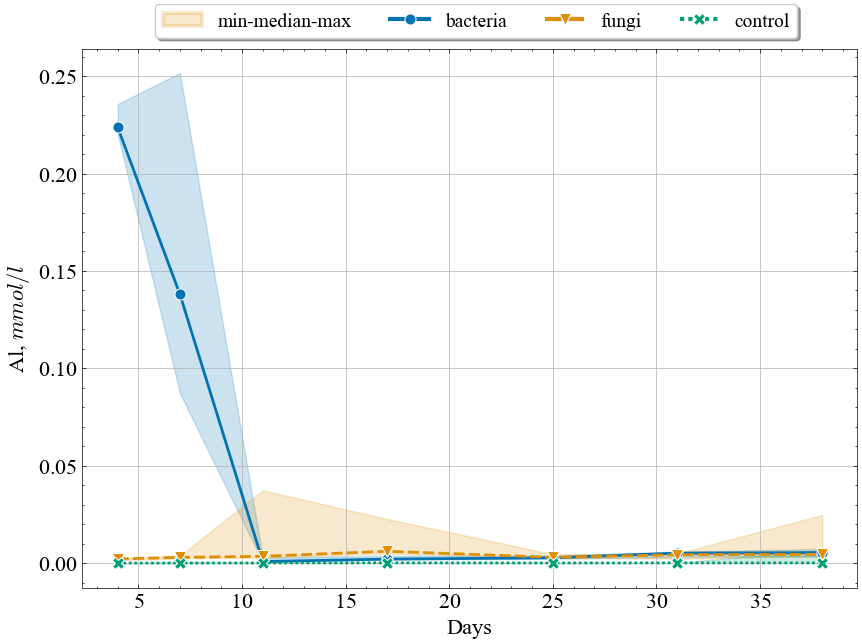

/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/1659530821.py:6: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',
/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/1659530821.py:29: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for i in leg.legendHandles:


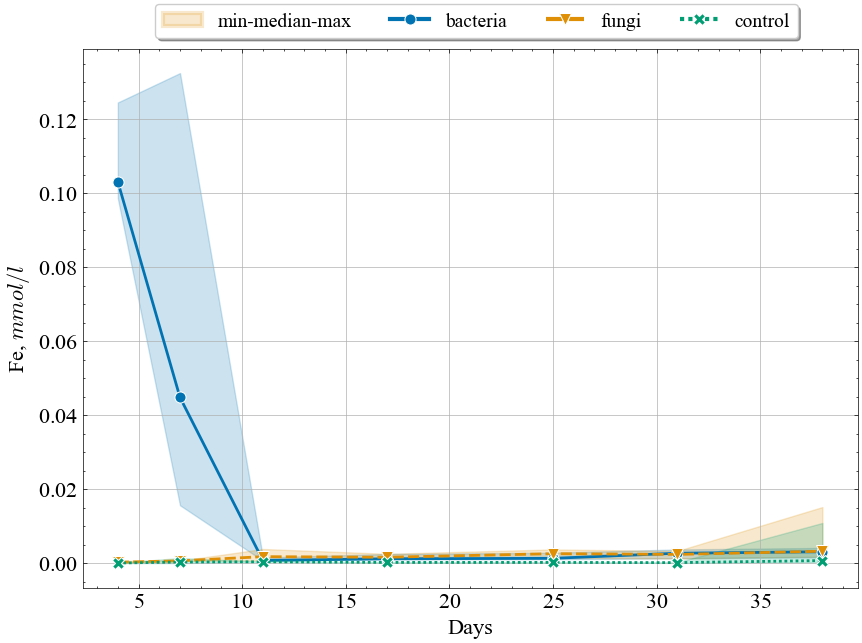

/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/1659530821.py:6: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',
/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/1659530821.py:29: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for i in leg.legendHandles:


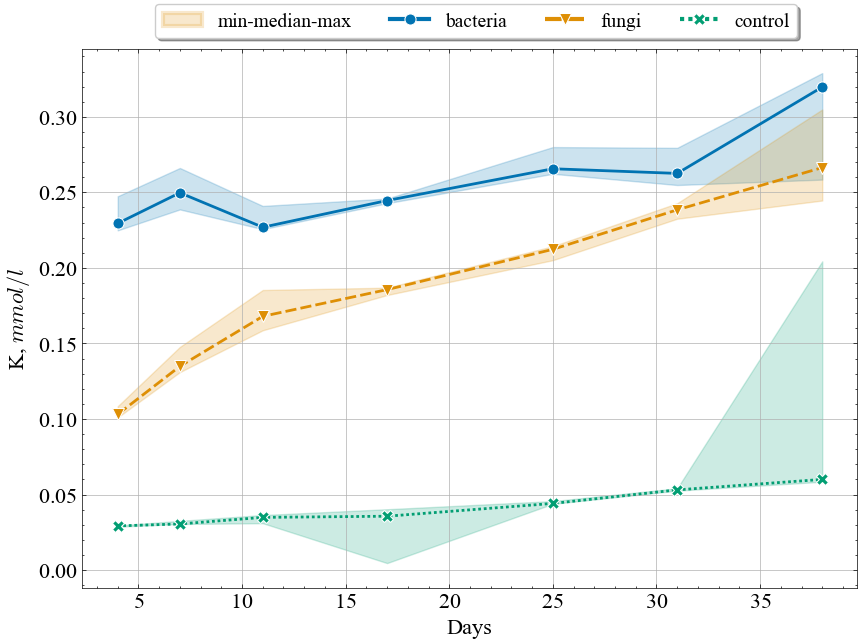

/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/1659530821.py:6: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',
/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/1659530821.py:29: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for i in leg.legendHandles:


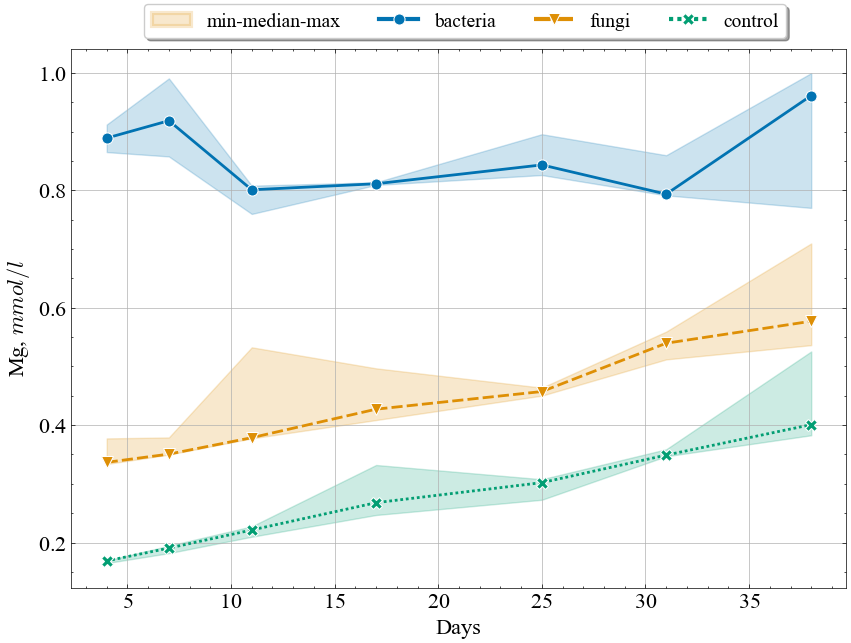

/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/1659530821.py:6: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',
/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/1659530821.py:29: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for i in leg.legendHandles:


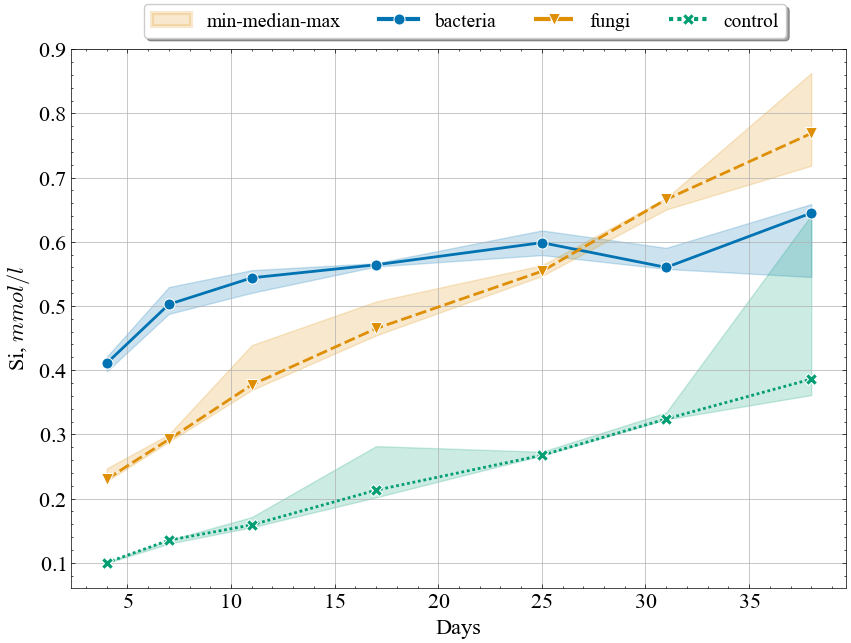

In [ ]:
folder = '../plots/microbs_fungi'
elements=['Al', 'Fe', 'K', 'Mg', 'Si']
for i, element in enumerate(elements):
    
    fig, ax = plt.subplots(1,1, figsize=(10,7))
    sns.lineplot(x='days',
                 y=element,
                 markersize=8, 
                 markers=["o", "v", 'X', "p", 'D'],
                 errorbar=lambda x: (x.min(), x.max()),
                 estimator='median',
                 linewidth = 2,
                 data=df, 
                 style = 'type', 
                 hue='type',
                 ax=ax
                )
    ax.grid()
    ax.collections[1].set_label('min-median-max')
    leg=ax.legend(frameon=True,           
               bbox_to_anchor=(.935, 1.10),
               fontsize=14,  
               ncol=4,
               shadow=True,)
    
#     leg = ax.legend()
    ax.set_ylabel(element+', $mmol/l$')
    ax.set_xlabel('Days')
    for i in leg.legendHandles:
        i.set_linewidth(3)
    fname = os.path.join(folder, element+'.png')
    plt.savefig(fname,  dpi=300)
    plt.show()
    # break

## 3. Plots

In [ ]:
df_melted = pd.melt(df, id_vars= ['type', 'days'],
        value_vars=['Al', 'Fe', 'K', 'Mg', 'Si', 'рН', 'ОВП','ЭП'])

/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/1304907771.py:36: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for i in leg.legendHandles:
/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/1304907771.py:36: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for i in leg.legendHandles:


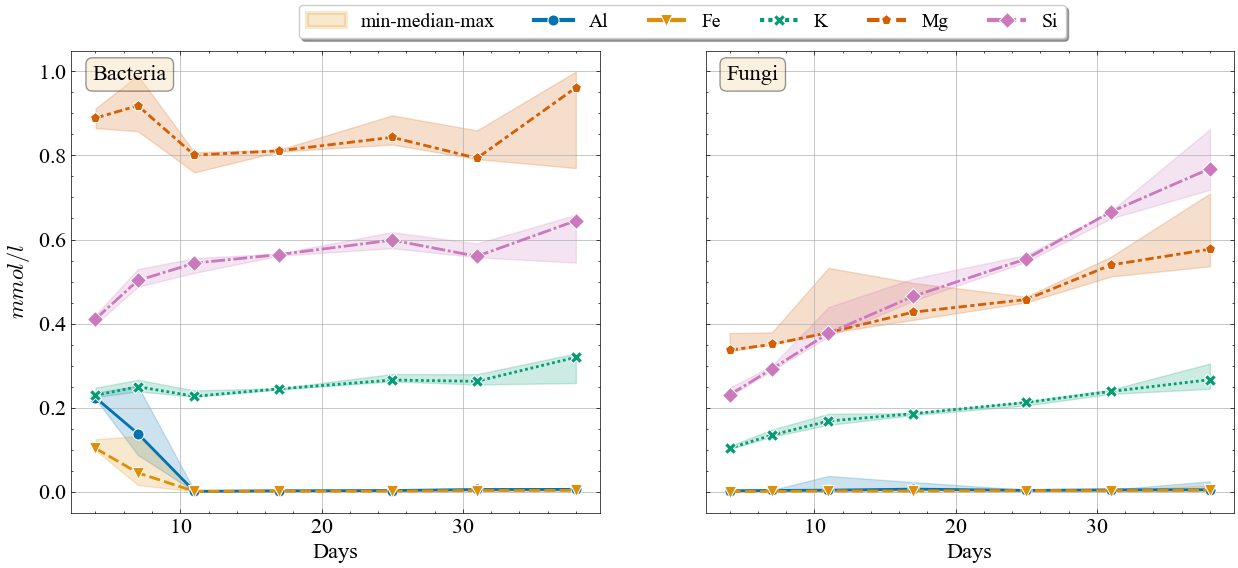

In [ ]:
folder = '../plots/microbs_fungi'
elements=['Al', 'Fe', 'K', 'Mg', 'Si']

fig, axes = plt.subplots(1,2, figsize=(15,6), sharey=True)
axes=axes.flatten()
for i, exp_type in enumerate(df['type'].unique()[:2]):
    mask = (df_melted['type'] == exp_type) & (df_melted['variable'].isin(elements))
    ax=axes[i]
    # fig, ax = plt.subplots(1,1, figsize=(10,7))
    sns.lineplot(x='days',
                 y='value',
                 markersize=8, 
                 markers=["o", "v", 'X', "p", 'D'],
                 errorbar=lambda x: (x.min(), x.max()),
                 estimator='median',
                 linewidth = 2,
                 data=df_melted.loc[mask], 
                 style = 'variable', 
                 hue='variable',
                 ax=ax
                )
    ax.grid()
    ax.collections[1].set_label('min-median-max')
    if i==0:
        leg=ax.legend(frameon=True,           
                   bbox_to_anchor=(1.9, 1.12),
                   fontsize=14,  
                   ncol=7,
                   shadow=True,)
        
    #     leg = ax.legend()
    else:
        ax.legend('')
    ax.set_ylabel('$mmol/l$')
    ax.set_xlabel('Days')
    for i in leg.legendHandles:
        i.set_linewidth(3)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.4)
    ax.text(0.04, 0.97, exp_type.capitalize(), transform=ax.transAxes, fontsize=16,
            verticalalignment='top', bbox=props)
    fname = os.path.join(folder, element+'.png')
    
    # plt.show()
    # break
fname = os.path.join(folder, 'Dynamic_Bact_Fungi'+'.png')
plt.savefig(fname,  dpi=300)
# fig.tight_layout()
plt.show()

## 4. Plots

-----

Графики динамики pH 

In [ ]:
def remove_noize(df:pd.DataFrame):
    df = df.copy()
    elemetns = ['Al', 'Ca', 'Fe', 'K', 'Mg', 'Si']
    mask = (df['days']==0)
    for element in elemetns:
        df.loc[mask, element] = df.loc[mask, element] - df.loc[~mask, element].values[0]
        df.loc[df[element]<0, element]=0
    return df

def ppm_to_mmol(df:pd.DataFrame):
    df=df.copy()
    elemetns = ['Al', 'Ca', 'Fe', 'K', 'Mg', 'Si']
    dict_AEM = {'Al':26.9,
            'Ca':40,
            'Fe':55.845, 
            'K':39,
            'Mg':24.30, 
            'Si':28}

    for element in elemetns:
        df.loc[:, element] = df.loc[:, element] / dict_AEM[element]
    return df

In [ ]:
df = pd.read_excel('../data/Воробьева_25012024.xlsx', sheet_name='v2')
df = df.drop(columns=['code'])
df = ppm_to_mmol(remove_noize(df))

In [ ]:
df_upd = pd.concat([df.iloc[1:, :], df.iloc[[0], :]], axis=0)

/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/586163949.py:2: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',


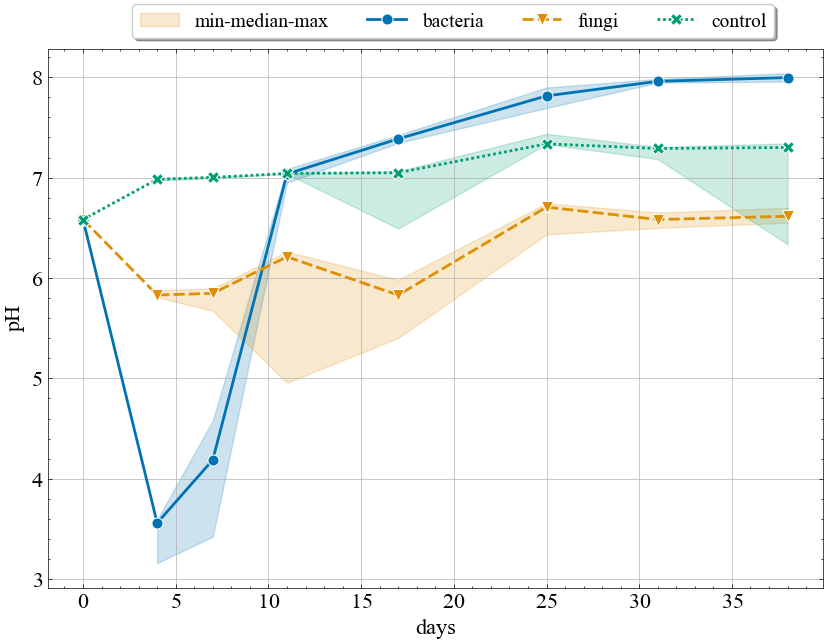

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(10,7))
sns.lineplot(x='days',
                 y='рН',
                 markersize=8, 
                 markers=["o", "v", 'X', "p", 'D'],
                 errorbar=lambda x: (x.min(), x.max()),
                 estimator='median',
                 linewidth = 2,
                 data=df, 
                 style = 'type', 
                 hue='type',
                 ax=ax
                )

ax.grid()
ax.collections[1].set_label('min-median-max')
leg=ax.legend(frameon=True,           
           bbox_to_anchor=(.95, 1.10),
           fontsize=14,  
           ncol=5,
           shadow=True,)

plt.savefig('../plots/microbs_fungi/pH.png', dpi=300)

/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/1240566552.py:2: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',


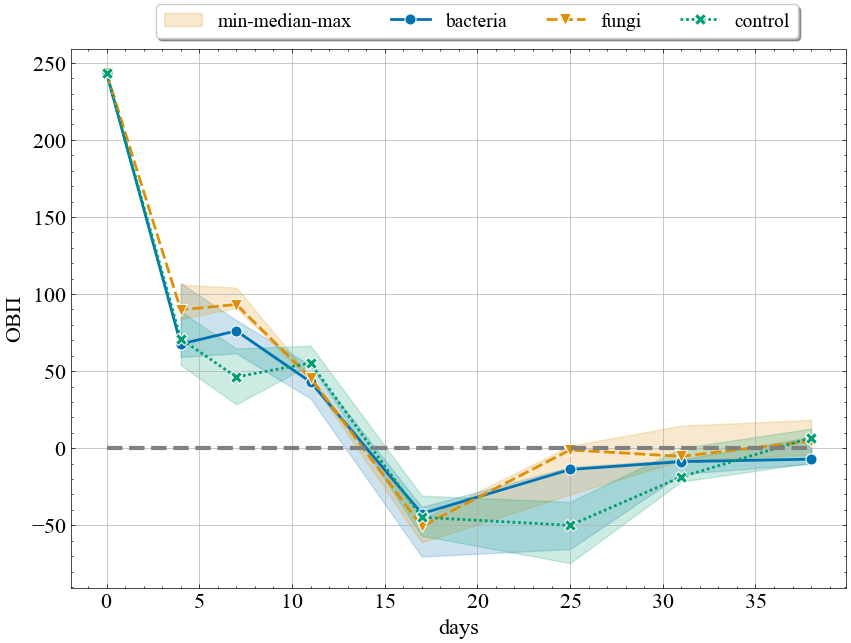

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(10,7))
sns.lineplot(x='days',
                 y='ОВП',
                 markersize=8, 
                 markers=["o", "v", 'X', "p", 'D'],
                 errorbar=lambda x: (x.min(), x.max()),
                 estimator='median',
                 linewidth = 2,
                 data=df, 
                 style = 'type',
                 hue='type',
                 ax=ax
                )

ax.grid()
ax.hlines(0,0,df['days'].max(), linestyles='dashed', linewidth=3, colors='grey')
ax.collections[1].set_label('min-median-max')
leg=ax.legend(frameon=True,           
           bbox_to_anchor=(.95, 1.10),
           fontsize=14,  
           ncol=5,
           shadow=True,)
# plt.savefig('../plots/microbs_fungi/OVP.png', dpi=300)

/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/1203175670.py:2: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',


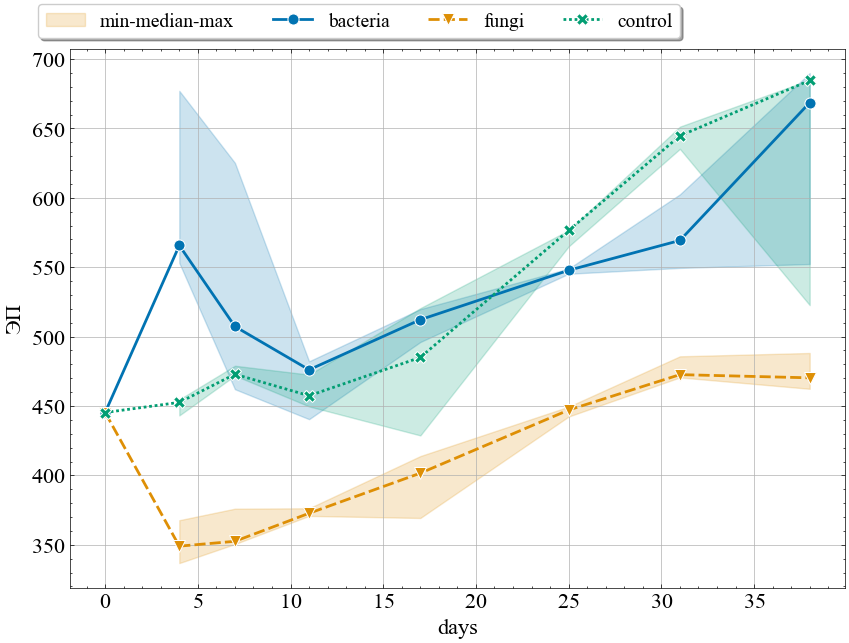

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(10,7))
sns.lineplot(x='days',
                 y='ЭП',
                 markersize=8, 
                 markers=["o", "v", 'X', "p", 'D'],
                 errorbar=lambda x: (x.min(), x.max()),
                 estimator='median',
                 linewidth = 2,
                data=df, 
                 style = 'type', 
                 hue='type',
                 ax=ax
                )

ax.grid()
# ax.hlines(0,0,df['days'].max(), linestyles='dashed', linewidth=3, colors='grey')
ax.collections[1].set_label('min-median-max')
leg=ax.legend(frameon=True,           
           bbox_to_anchor=(.8, 1.10),
           fontsize=14,  
           ncol=5,
           shadow=True,)

# plt.savefig('../plots/microbs_fungi/EP.png', dpi=300)

## 5. Plots

-------

Совместная динамика pH и Al

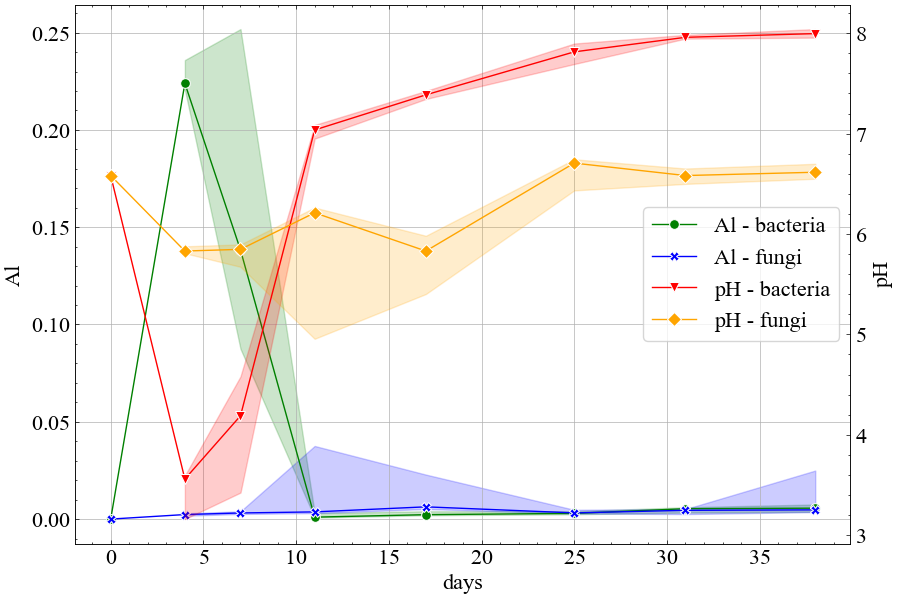

In [ ]:

type = 'bacteria'

element = 'Al'
mask = (df['type']==type)
fig, ax = plt.subplots(1,1, figsize=(10,7))
data = df.loc[mask, ['days', 'рН', element]]
sns.lineplot(x = 'days', 
             y=element,
             errorbar=lambda x: (x.min(), x.max()),
             estimator='median',
             data=data,
             marker='o',
            markersize=7,
             color="g",
             label='Al - bacteria', ax=ax)


ax2 = plt.twinx()
sns.lineplot(x = 'days',
             y='рН', 
            errorbar=lambda x: (x.min(), x.max()),
             estimator='median',
             
             data=data,
             marker='v',
            markersize=7,
             label='pH - bacteria', 
             color="r", ax=ax2)

type = 'fungi'
mask = (df['type']==type)
data = df.loc[mask, ['days', 'рН', element]]
sns.lineplot(x = 'days',
             y=element,
             
             data=data,
             errorbar=lambda x: (x.min(), x.max()),
             estimator='median',
             marker='X',
            markersize=7,
             color="b", label='Al - fungi', ax=ax)
sns.lineplot(x = 'days', 
             y='рН', 
             data=data, 
            errorbar=lambda x: (x.min(), x.max()),
             estimator='median',
             marker='D',
            markersize=7,
             label='pH - fungi', 
             color="orange", ax=ax2)

ax.grid()
# ax2.collections[1].set_label('Standard deviation')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=5, frameon=True)
# ax2.legend( bbox_to_anchor=(0.996, .6))
# ax.legend( bbox_to_anchor=(0.996, .5))

# ax.collections[0].set_label('Standard deviation')
leg=ax.legend('')           
# leg=ax2.legend(frameon=True)           
#            bbox_to_anchor=(1.05, 1.10),
#            fontsize=14,  
#            ncol=5,
           # shadow=True,)
plt.savefig('../plots/microbs_fungi/Al_vs_pH.png', dpi=300)

## 3. Отношения элементов к Si

In [ ]:
for element in ['Al', 'Fe', 'K', 'Mg']:
    df.loc[:, f'ratio_{element}_to_Si'] = df[element]/df['Si']    

In [ ]:
base_concetration = {"ratio_Mg_to_Si": 2.64/3.04, 
                    "ratio_Ca_to_Si": .11/3.04, 
                    "ratio_Fe_to_Si": 0.27/3.04, 
                    "ratio_Al_to_Si": 0.99/3.04,
                    "ratio_K_to_Si": 0.67/3.04,
                    "ratio_K_to_Mg": 0.67/2.64}

/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/2136223147.py:16: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',


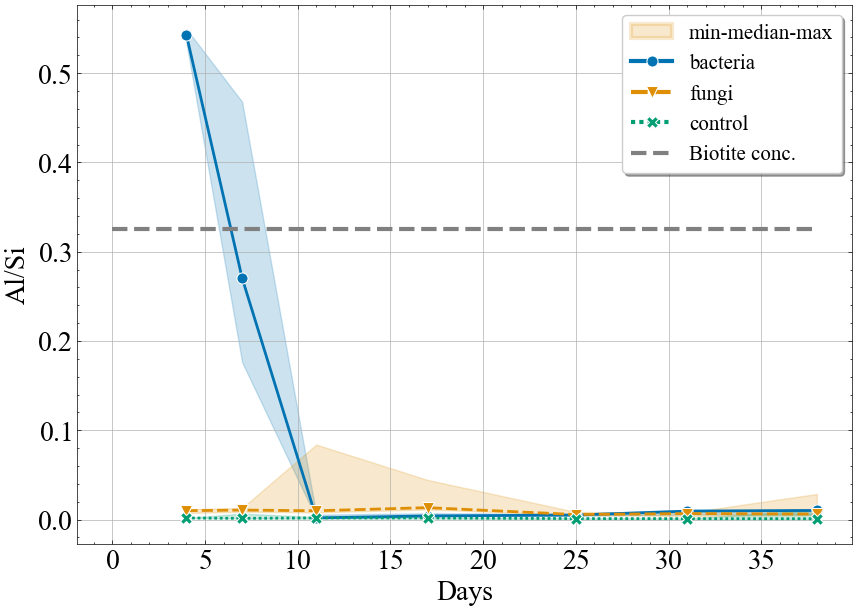

/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/2136223147.py:16: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',


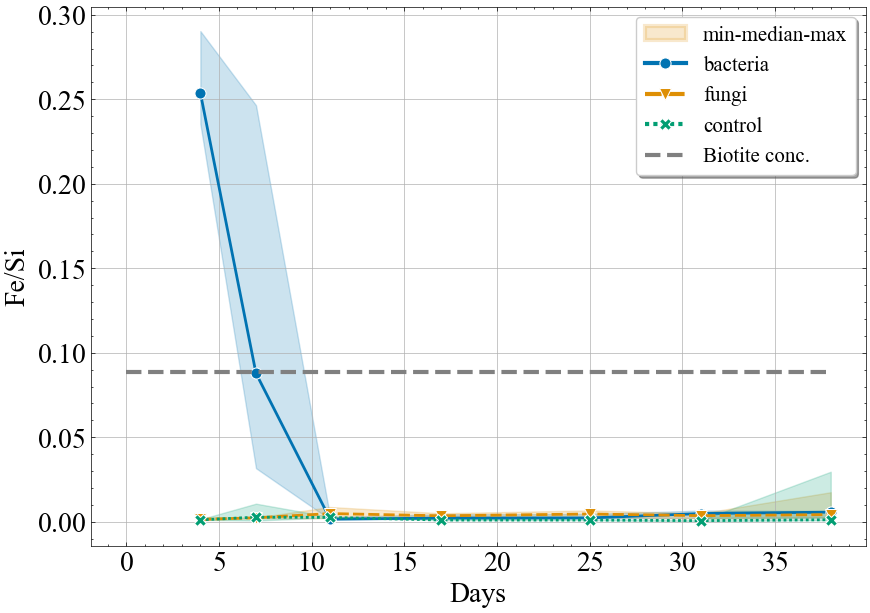

/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/2136223147.py:16: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',


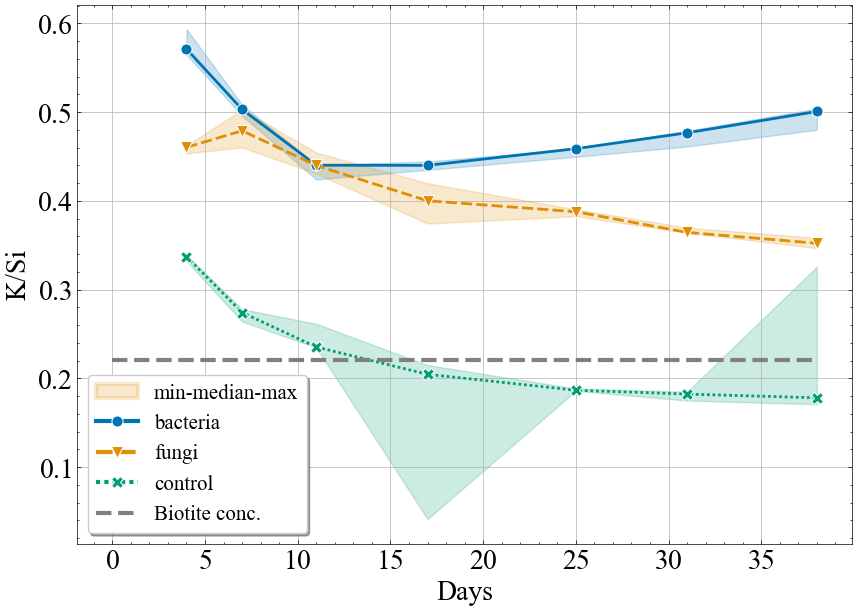

/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/2136223147.py:16: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',


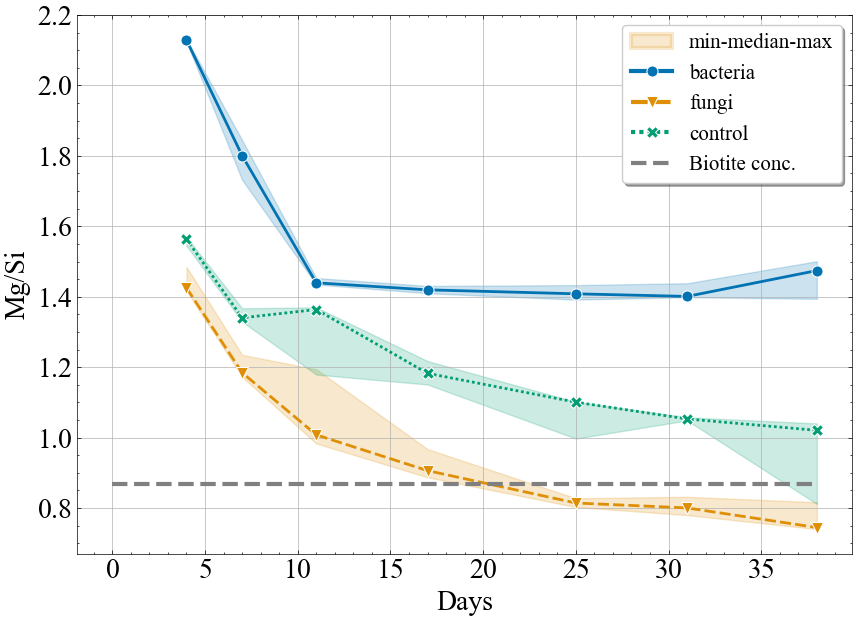

In [ ]:


# fig, axes = plt.subplots(3,2, figsize=(12,6))
# axes=axes.flatten()
font_size = 20
plt.rc('axes', titlesize=font_size)
plt.rc('xtick', labelsize=font_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_size)    # fontsize of the tick labels
folder = '../plots/'
ratios=['ratio_Al_to_Si', 'ratio_Fe_to_Si', 'ratio_K_to_Si','ratio_Mg_to_Si']
# ratios=['ratio_Mg_to_Si','ratio_Al_to_Si']
annots = ['A','Б','В', 'Г']
# fig, axes = plt.subplots(2,2, figsize=(15,5))
# axes=axes.flatten()
for i, element in enumerate(ratios):
    # ax=axes[i]
    fig, ax = plt.subplots(1,1, figsize=(10,7))
    sns.lineplot(x='days',
                 y=element,
                 markersize=8, 
                 markers=["o", "v", 'X', "p", 'D'],
                 errorbar=lambda x: (x.min(), x.max()),
                 estimator='median',
                 linewidth = 2,
                 data=df, 
                 style = 'type', 
                 hue='type',
                 ax=ax
                )
    
    ax.grid()
    ax.collections[1].set_label('min-median-max')
    ax.hlines(y=base_concetration[element], xmin=0, 
              xmax=38, 
              linestyles='dashed', 
              label = 'Biotite conc.',# In biotite 
             linewidth=3, 
             color='grey', )
    # if i==1:
    leg=ax.legend(frameon=True,           
               # bbox_to_anchor=(1., 1.2),
               fontsize=15,  
               # ncol=4,
               shadow=True,)
    for j in leg.legend_handles:
        j.set_linewidth(3)
    # else:
        # ax.get_legend().remove()

#     leg = ax.legend()
    naming = element.split('_')[1] + '/' + element.split('_')[3]
    ax.set_ylabel(naming, fontsize=font_size)
    ax.set_xlabel('Days', fontsize=font_size)
        
    fname = os.path.join(folder, f'ratio_{element}_to_Si_en.png')
    plt.savefig(fname,  dpi=300)
    plt.show()
    

/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/3906606263.py:4: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',
/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_63397/3906606263.py:31: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for i in leg.legendHandles:


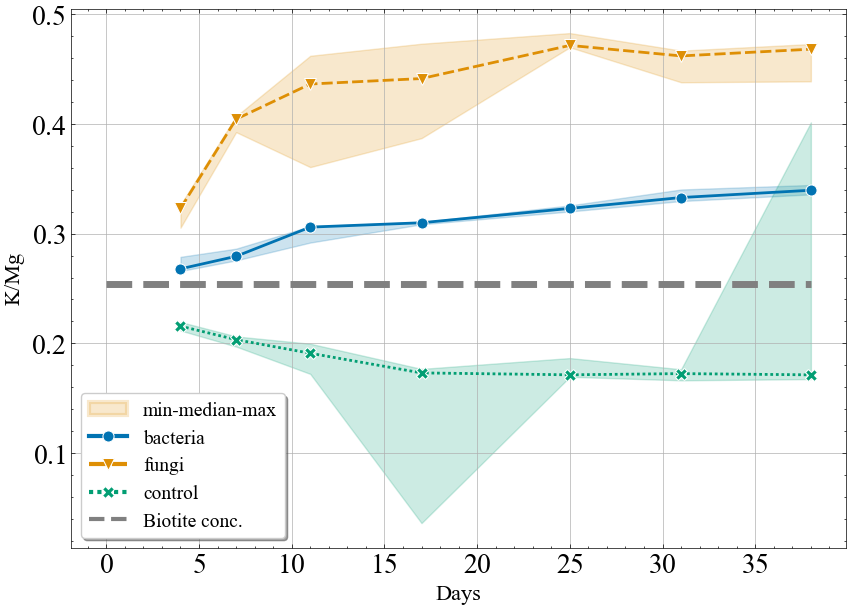

In [ ]:
folder = '../plots/'
df.loc[:, f'ratio_K_to_Mg'] = df['K']/df['Mg']
fig, ax = plt.subplots(1,1, figsize=(10,7))
sns.lineplot(x='days',
             y='ratio_K_to_Mg',
             markersize=8, 
             markers=["o", "v", 'X', "p", 'D'],
             errorbar=lambda x: (x.min(), x.max()),
             estimator='median',
             linewidth = 2, 
             data=df, 
             style = 'type', 
             hue='type',
             ax=ax
            )
ax.grid()
ax.collections[1].set_label('min-median-max')
ax.hlines(y=base_concetration['ratio_K_to_Mg'], xmin=0, xmax=38, 
          linestyles='dashed', 
          label = 'Biotite conc.', 
         linewidth=5, 
         color='grey', )
leg=ax.legend(frameon=True,           
           # bbox_to_anchor=(0.91, 1.2),
           fontsize=14,  
           # ncol=3,
           shadow=True,)
# naming = element.split('_')[1] + '/' + element.split('_')[3]
ax.set_ylabel('K/Mg')
ax.set_xlabel('Days')
for i in leg.legendHandles:
    i.set_linewidth(3)
fname = os.path.join(folder, 'K_ratio_Mg'+'.png')
plt.savefig(fname,  dpi=300)
plt.show()

## Зависимость Eh от pH

In [ ]:
colors = sns.color_palette(palette='viridis_r', n_colors=df['days'].nunique())

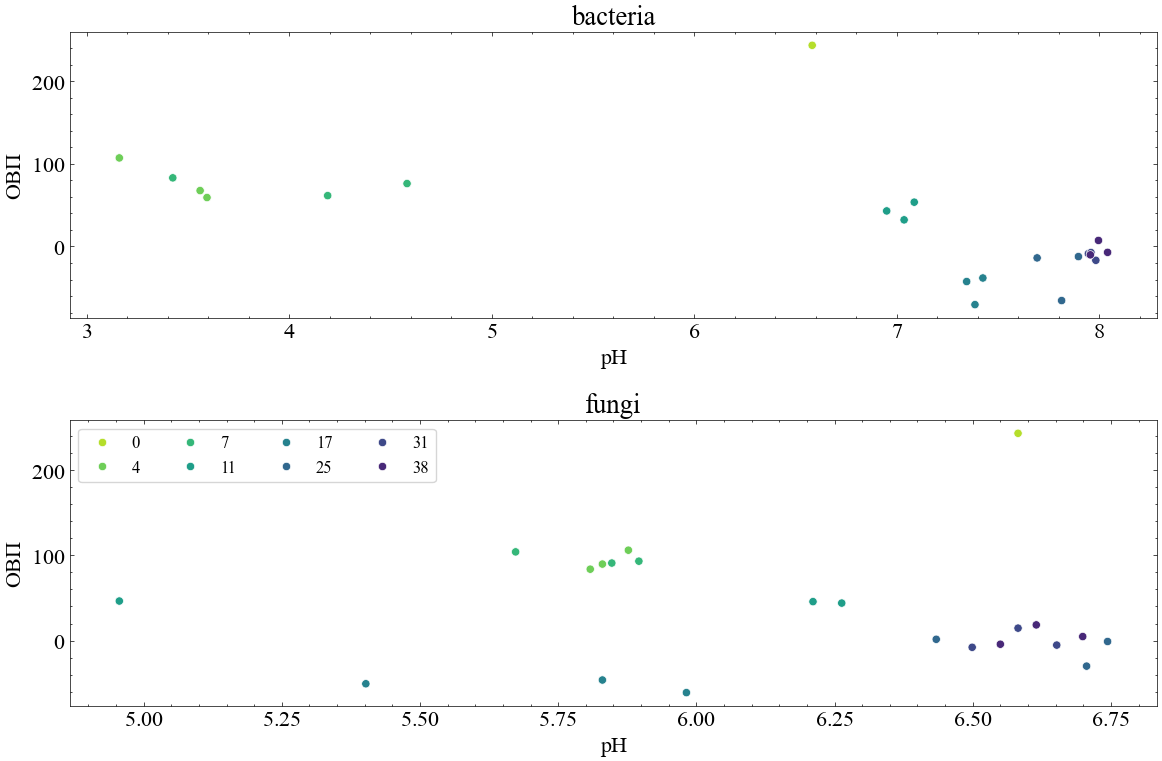

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
# for type in ['bacteria', 'fungi']:
mask = df['type']=='bacteria'
# sns.regplot(y='ОВП',x='рН', huedata=df.loc[mask],ax=ax, label=type)
sns.scatterplot(y='ОВП',x='рН', hue='days', palette=colors,  data=df.loc[mask], ax=ax1)
mask = df['type']=='fungi'
# sns.regplot(y='ОВП',x='рН', huedata=df.loc[mask],ax=ax, label=type)
sns.scatterplot(y='ОВП',x='рН', hue='days', palette=colors,  data=df.loc[mask], ax=ax2)
    # break
ax1.set_title('bacteria')
ax2.set_title('fungi')
ax1.legend('')
ax2.legend(frameon=True, ncol=4, fontsize=12)
fig.tight_layout()

In [ ]:
colors = sns.color_palette(palette='colorblind', n_colors=df['days'].nunique())

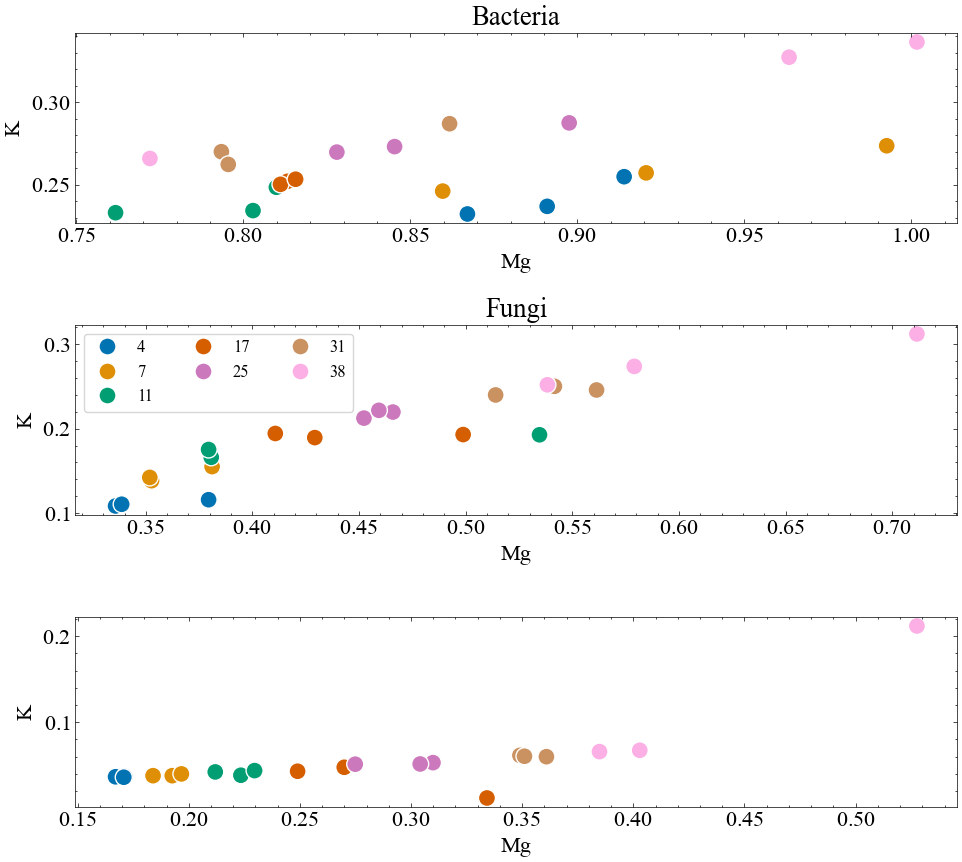

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,9))
# for type in ['bacteria', 'fungi']:
mask = (df['type']=='bacteria') & (df['days']!=0)
colors = sns.color_palette(palette='colorblind', n_colors=df.loc[mask, 'days'].nunique())
sns.scatterplot(y='K',x='Mg', hue='days', 
                palette=colors,s=150,
                data=df.loc[mask], ax=ax1)

mask = (df['type']=='fungi') & (df['days']!=0)
sns.scatterplot(y='K',x='Mg', hue='days',
                palette=colors,s=150, 
                data=df.loc[mask], ax=ax2)
    # break

mask = (df['type']=='control') & (df['days']!=0)
sns.scatterplot(y='K',x='Mg', hue='days',
                palette=colors,s=150, 
                data=df.loc[mask], ax=ax3)
    # break
ax1.set_title('Bacteria')
ax2.set_title('Fungi')
ax3.legend('Control')
ax1.legend('')
ax3.legend('')
ax2.legend(frameon=True, ncol=3, fontsize=12)
fig.tight_layout()